<a href="https://colab.research.google.com/github/fbghkh1999/dataIntroduction/blob/main/dataAnalyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
#datasetimport
dataset_train = pd.read_csv('/content/datasets_11956_16450_international-airline-passengers.csv')

y = dataset_train.iloc[:,-1].values
y = np.reshape(y,(y.shape[0], 1))
'''training_set = X.iloc[0:100,0:2].values
test_set = X.iloc[100:145,0:2].values'''
'''test_set=np.reshape(test_set,(test_set.shape[0], 1))'''
'''training_set = np.reshape(training_set,(training_set.shape[0], 1))
training_set'''

#delete nan
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = imputer.fit_transform(y)

In [ ]:
#skale data into 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
my_set_scaled = sc.fit_transform(y)
train_set_scaled=my_set_scaled[0:100]
test_scale=my_set_scaled[97:145]
train_set_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [ ]:
x_train = []
y_train = []

for i in range(3, len(train_set_scaled)):
  x_train.append(train_set_scaled[i-3:i,0])
  y_train.append(train_set_scaled[i,0])

In [ ]:
#REforming to np arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#reshaping to 3d tensor
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
x_train





x_test = []
y_test = []

for i in range(3,len(test_scale)):
  x_test.append(test_scale[i-3:i,0])
  y_test.append(test_scale[i,0])

x_test, y_test = np.array(x_test), np.array(y_test) 

x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.38030888],
        [0.48648649],
        [0.47104247]],

       [[0.48648649],
        [0.47104247],
        [0.48455598]],

       [[0.47104247],
        [0.48455598],
        [0.61389961]],

       [[0.48455598],
        [0.61389961],
        [0.6969112 ]],

       [[0.61389961],
        [0.6969112 ],
        [0.7007722 ]],

       [[0.6969112 ],
        [0.7007722 ],
        [0.57915058]],

       [[0.7007722 ],
        [0.57915058],
        [0.46911197]],

       [[0.57915058],
        [0.46911197],
        [0.38803089]],

       [[0.46911197],
        [0.38803089],
        [0.44787645]],

       [[0.38803089],
        [0.44787645],
        [0.45559846]],

       [[0.44787645],
        [0.45559846],
        [0.41312741]],

       [[0.45559846],
        [0.41312741],
        [0.4980695 ]],

       [[0.41312741],
        [0.4980695 ],
        [0.47104247]],

       [[0.4980695 ],
        [0.47104247],
        [0.5       ]],

       [[0.47104247],
        [0.5       ],
    

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#preparing the sequential model 
model = Sequential()

In [ ]:
#LSTM first layer  
model.add(LSTM(units=50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.20))
#LSTM second layer 
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.20))
#LSTM third layer 
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.20))
#LSTM forth layer 
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.20))

#Dense output layer
model.add(Dense(units = 1))

#compile
model.compile(optimizer='adam', loss='mean_squared_error')

#fit
model.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0557
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0234
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0208
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0180
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0167
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0146
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0092
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0083
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0078
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 11/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 12/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 13/100
10/10 [=================

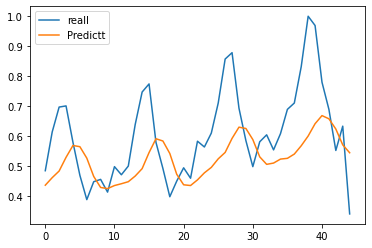

In [ ]:





'''model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model2.add(Dropout(0.20))
#LSTM second layer 
model2.add(LSTM(units=50, return_sequences=True))
model2.add(Dropout(0.20))
#LSTM third layer 
model2.add(LSTM(units=50, return_sequences=True))
model2.add(Dropout(0.20))
#LSTM forth layer 
model2.add(LSTM(units=50))
model2.add(Dropout(0.20))

#Dense output layer
model2.add(Dense(units = 1))

#compile
model2.compile(optimizer='adam', loss='mean_squared_error')

#fit
model2.fit(x_train, y_train, epochs=100, batch_size=10)'''




prediction_y = model.predict(x_test)
plt.plot(y_test, label='reall')
plt.plot(prediction_y, label='Predictt')
plt.legend()
plt.show()

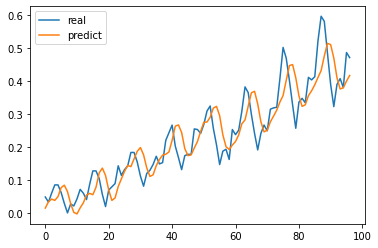

In [ ]:
prediction_y22 = model.predict(x_train)
plt.plot(y_train, label='real')
plt.plot(prediction_y22, label='predict')
plt.legend()
plt.show()